In [1]:
!pip3 install spotipy pandas matplotlib seaborn


  Using cached pandas-2.2.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (19 kB)
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 3.0 MB/s eta 0:00:00a 0:00:01
Using cached pandas-2.2.2-cp312-cp312-macosx_11_0_arm64.whl (11.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 8.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.6 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.5 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 9.0 MB/s eta 0

       popularity    duration_ms  duration_min
count   50.000000      50.000000     50.000000
mean    45.620000  259483.000000      4.324717
std     18.290055   93863.932964      1.564399
min      3.000000   46768.000000      0.779467
25%     36.000000  216023.250000      3.600388
50%     47.000000  275784.500000      4.596408
75%     57.750000  326728.000000      5.445467
max     85.000000  406700.000000      6.778333


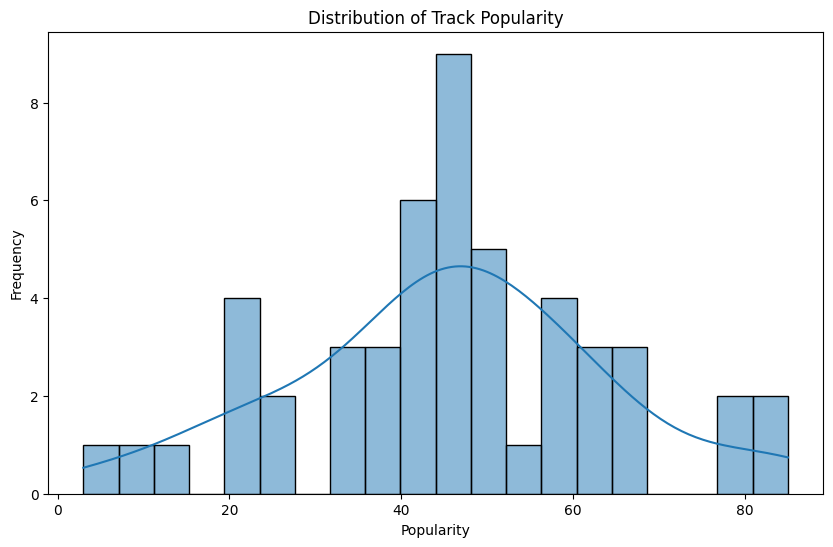

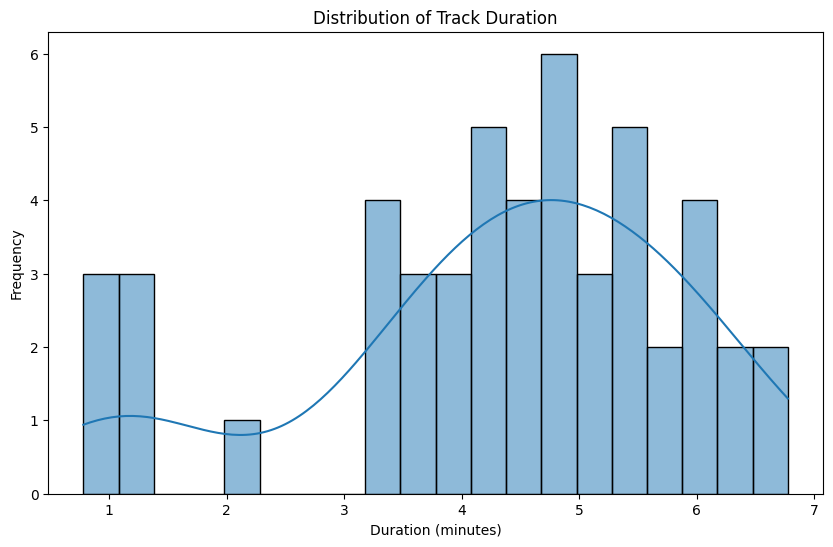

       popularity     followers
count   41.000000  4.100000e+01
mean    66.073171  1.073146e+07
std      9.683466  1.938860e+07
min     47.000000  1.009420e+05
25%     59.000000  1.564533e+06
50%     66.000000  5.390669e+06
75%     72.000000  1.074918e+07
max    100.000000  1.121005e+08


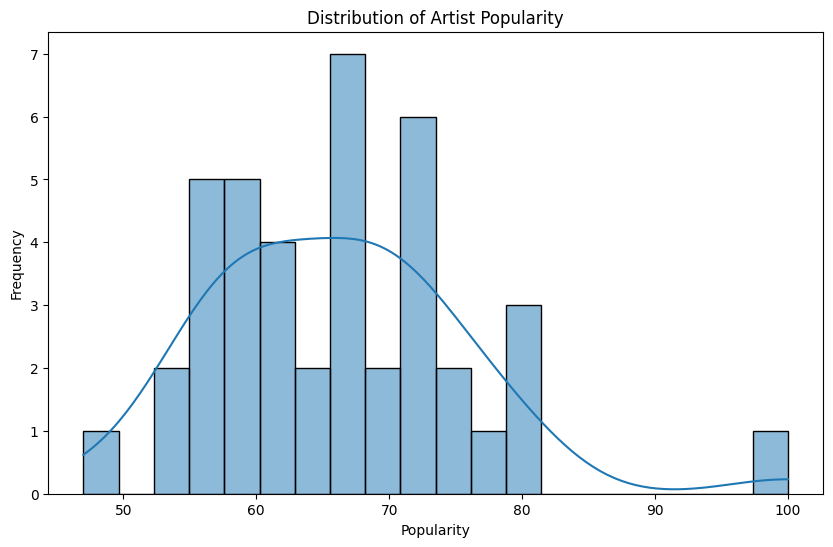

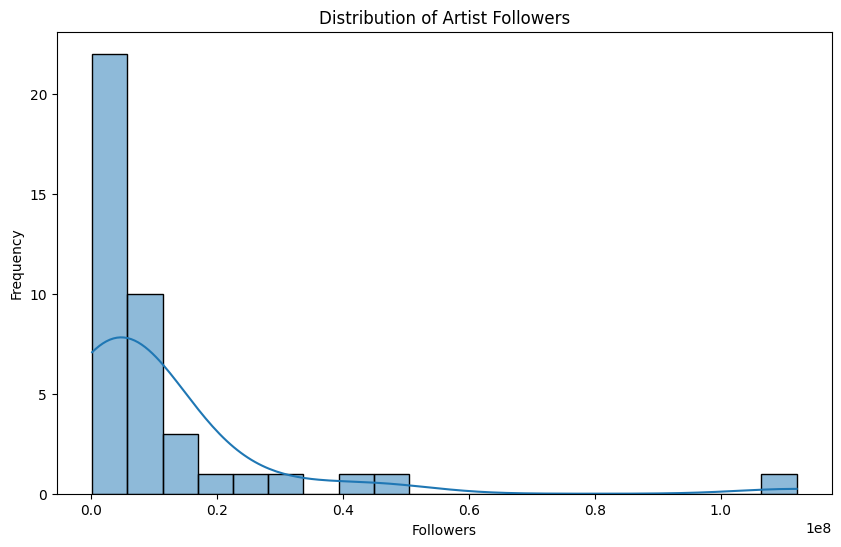

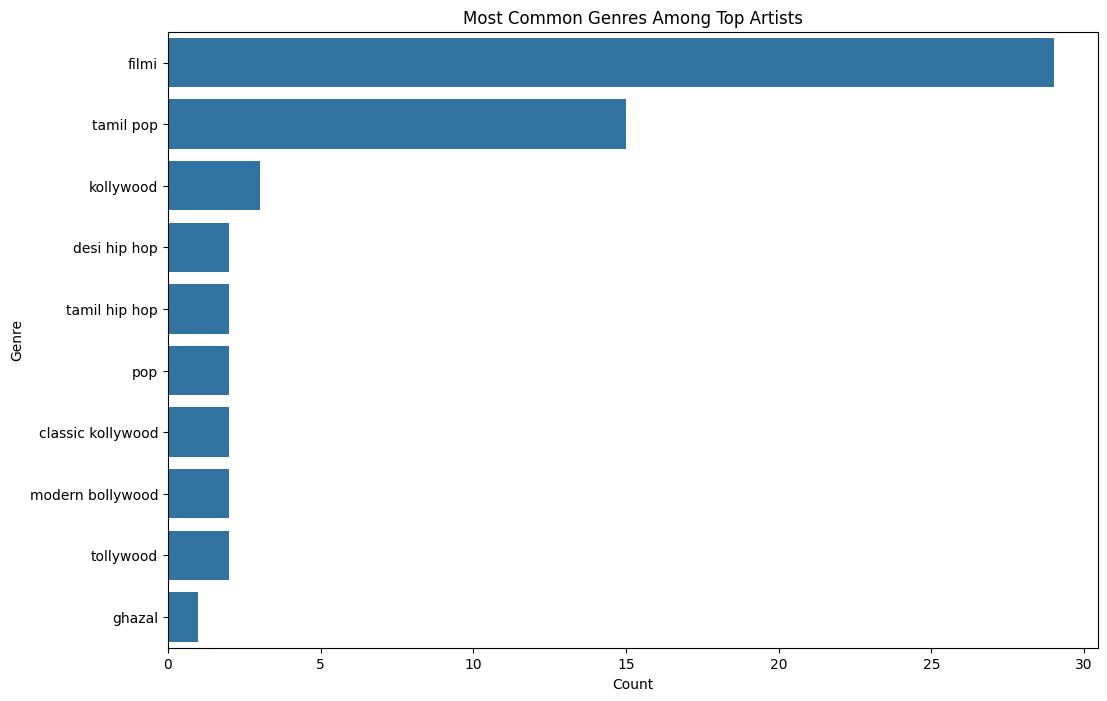

In [3]:
# Spotify Data Analysis

## Import Required Libraries
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Set Up Spotify API Credentials
# Replace these with your own credentials
CLIENT_ID = 'fe0d8b96a2ef45feb79788900c2e6a38'
CLIENT_SECRET = '37f237adaaff44448d0e8030fd125247'
REDIRECT_URI = 'http://localhost:8888/callback'

# Scope for accessing user top tracks and top artists
SCOPE = 'user-top-read'

# Authenticate with Spotify
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=CLIENT_ID,
                                               client_secret=CLIENT_SECRET,
                                               redirect_uri=REDIRECT_URI,
                                               scope=SCOPE))

## Fetch Top Tracks
top_tracks = sp.current_user_top_tracks(limit=50)
tracks = top_tracks['items']

# Create a DataFrame
tracks_data = {
    'name': [track['name'] for track in tracks],
    'album': [track['album']['name'] for track in tracks],
    'artist': [track['artists'][0]['name'] for track in tracks],
    'popularity': [track['popularity'] for track in tracks],
    'duration_ms': [track['duration_ms'] for track in tracks]
}

tracks_df = pd.DataFrame(tracks_data)

## Analyze Data

# Convert duration from ms to minutes
tracks_df['duration_min'] = tracks_df['duration_ms'] / 60000

# Display the first few rows
tracks_df.head()

# Summary Statistics
print(tracks_df.describe())

## Visualize Data

# Popularity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(tracks_df['popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# Duration Distribution
plt.figure(figsize=(10, 6))
sns.histplot(tracks_df['duration_min'], bins=20, kde=True)
plt.title('Distribution of Track Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

## Fetch Top Artists
top_artists = sp.current_user_top_artists(limit=50)
artists = top_artists['items']

# Create a DataFrame
artists_data = {
    'name': [artist['name'] for artist in artists],
    'genres': [", ".join(artist['genres']) for artist in artists],
    'popularity': [artist['popularity'] for artist in artists],
    'followers': [artist['followers']['total'] for artist in artists]
}

artists_df = pd.DataFrame(artists_data)

# Display the first few rows
artists_df.head()

## Analyze Data

# Summary Statistics
print(artists_df.describe())

## Visualize Data

# Popularity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(artists_df['popularity'], bins=20, kde=True)
plt.title('Distribution of Artist Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# Followers Distribution
plt.figure(figsize=(10, 6))
sns.histplot(artists_df['followers'], bins=20, kde=True)
plt.title('Distribution of Artist Followers')
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.show()

# Most Common Genres
from collections import Counter

# Flatten the list of genres
all_genres = [genre for sublist in [artist['genres'] for artist in artists] for genre in sublist]
genre_counts = Counter(all_genres)
common_genres = genre_counts.most_common(10)

# Create a DataFrame for the most common genres
genres_df = pd.DataFrame(common_genres, columns=['genre', 'count'])

# Plot the most common genres
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='genre', data=genres_df)
plt.title('Most Common Genres Among Top Artists')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()
